In [3]:
import cv2
import imutils
import matplotlib.pyplot as plt

In [4]:
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread("jp.png")
(h, w, d) = image.shape
print("height {h}, width {w}, depth {d}".format(h=h, w=w, d=d))

height 322, width 600, depth 3


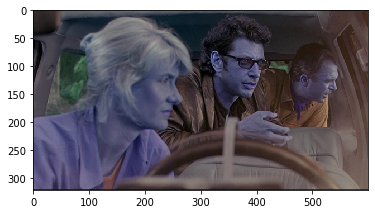

In [5]:
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
%matplotlib inline
plt.imshow(image)
plt.show()
# cv2.waitKey(0)

# Extracting Region of Interest (ROIs)

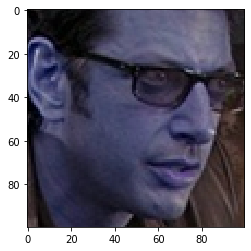

In [6]:
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
roi = image[60:160, 320:420]
plt.imshow(roi)
plt.show()

# Resizing Images

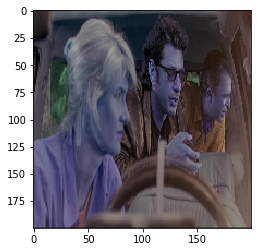

In [7]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))
plt.imshow(resized)
plt.show()

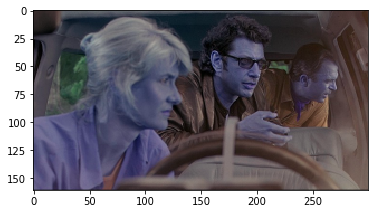

In [8]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w
resized = cv2.resize(image, (300, int(r * h)))
plt.imshow(resized)
plt.show()

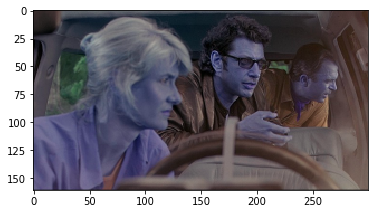

In [9]:
# manually computing the aspect ratio can be a pain so let's use the
# imutils library instead
resized = imutils.resize(image, width=300)
plt.imshow(resized)
plt.show()

# Rotating an image

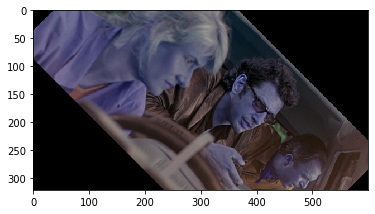

In [10]:
# let's rotate an image 45 degrees clockwise using OpenCV by first
# computing the image center, then constructing the rotation matrix,
# and then finally applying the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)
plt.show()

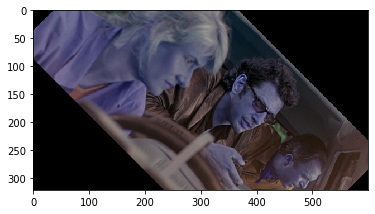

In [12]:
# rotation can also be easily accomplished via imutils with less code
rotated = imutils.rotate(image, -45)
plt.imshow(rotated)
plt.show()

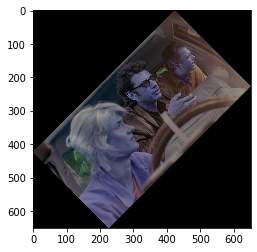

In [13]:
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out
rotated = imutils.rotate_bound(image, -45)
plt.imshow(rotated)
plt.show()

# Smoothing an image

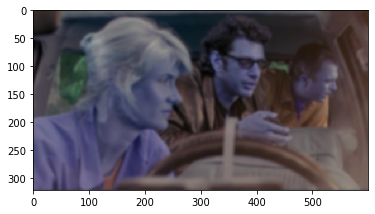

In [15]:
blured = cv2.GaussianBlur(image, (11, 11), 0)
plt.imshow(blured)
plt.show()

# Drawing on an image

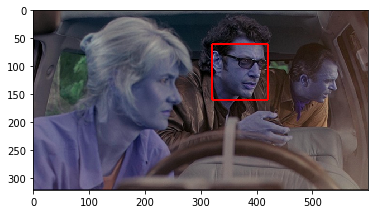

In [17]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (255, 0, 0), 2) # image, pt1, pt2, color, thickness
plt.imshow(output)
plt.show()

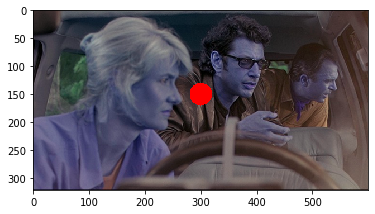

In [19]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1) # image, center, radius, color, thickness
plt.imshow(output)
plt.show()

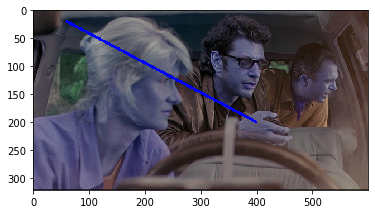

In [20]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 3) #image, pt1, pt2, color, thickness
plt.imshow(output)
plt.show()

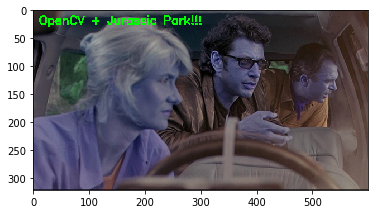

In [21]:
# draw green text on the image
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2) # image, text, pt, font_family, scale, color, thickness
plt.imshow(output)
plt.show()